In [10]:
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
a = [[100 * 1 + 0 * 0.5 + 0 * 0, 10 * 1 + 35 * 0.5],
    [99 * 1 + 0.5 * 1, 4 * 1 + 20 * 0.5],
    [91 * 1 + 9 * 0.5, 0 * 1 + 16 * 0.5]]

In [4]:
annots = [['100/0/0', '10/35/55'], ['99/1/0','4/20/76'], ['91/9/0', '0/16/94']]

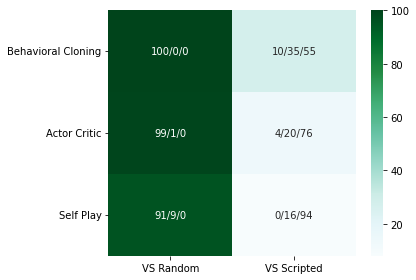

In [12]:
sns.heatmap(a, annot=annots, fmt='s', xticklabels=['VS Random', 'VS Scripted'], yticklabels=['Behavioral Cloning', 'Actor Critic', 'Self Play'], cmap='BuGn')
plt.tight_layout()
plt.savefig('heatmap.pdf')

In [51]:
import pandas as pd
d = pd.read_csv('/local/s3092593/logs/botbowl-11/4f1b98cc-e122-11ec-a651-3cecef3aa7e8.dat', names=['updates', 'episodes', 'ts', 'win_rate', 'tds', 'opp_tds', 'reward', 'diff'])

In [6]:
d

,updates,episodes,ts,win_rate,tds,opp_tds,reward,diff
0,50,30,20000,0.450000,0.533333,0.700000,-0.881333,1
1,100,61,40000,0.451613,0.548387,0.516129,1.633226,1
2,150,95,60000,0.411765,0.470588,0.676471,-0.593971,1
3,200,130,80000,0.542857,0.800000,0.685714,0.783000,1
4,250,166,100000,0.361111,0.361111,0.805556,-1.252500,1
...,...,...,...,...,...,...,...,...
309,15500,10570,6200000,0.428571,0.257143,0.457143,-0.475286,1
310,15550,10603,6220000,0.469697,0.303030,0.454545,0.296970,1
311,15600,10635,6240000,0.375000,0.062500,0.531250,-0.787031,1
312,15650,10669,6260000,0.382353,0.235294,0.470588,0.322353,1


(0.0, 1.0)

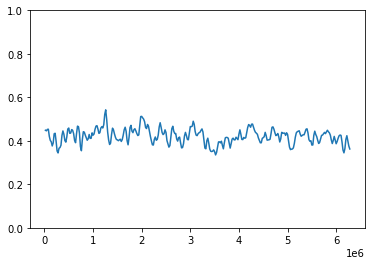

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
plt.plot(d['ts'], gaussian_filter(d['win_rate'], 1))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylim([0,1 ])

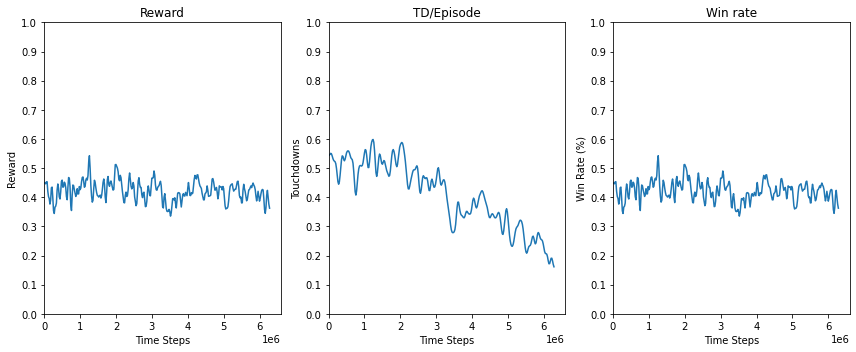

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(4*3, 5))
axs[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[0].plot(d['ts'], gaussian_filter(d['win_rate'], 1))
axs[0].set_title('Reward')
axs[0].set_ylim([0, 1])
axs[0].set_yticks(np.arange(0, 1.001, step=0.1))
axs[0].set_xlabel('Time Steps')
axs[0].set_ylabel('Reward')

axs[0].set_xlim(left=0)
axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[1].plot(d['ts'], gaussian_filter(d['tds'], 2), label="Learner")
axs[1].set_title('TD/Episode')
axs[1].set_ylim(bottom=0.0)
axs[1].set_yticks(np.arange(0, 1.001, step=0.1))
axs[1].set_xlim(left=0)
axs[1].set_xlabel('Time Steps')
axs[1].set_ylabel('Touchdowns')

if False:
    axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[1].plot(d['ts'], log_td_rate_opp, color="red", label="Opponent")
axs[2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[2].plot(d['ts'], gaussian_filter(d['win_rate'], 1))
axs[2].set_title('Win rate')            
axs[2].set_yticks(np.arange(0, 1.001, step=0.1))
axs[2].set_xlim(left=0)
axs[2].set_xlabel('Time Steps')
axs[2].set_ylabel('Win Rate (%)')

if False:
    axs[3].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[3].plot(log_steps, log_difficulty)
    axs[3].set_title('Difficulty')
    axs[3].set_yticks(np.arange(0, 1.001, step=0.1))
    axs[3].set_xlim(left=0)
fig.tight_layout()
plt.savefig('self_play.pdf')

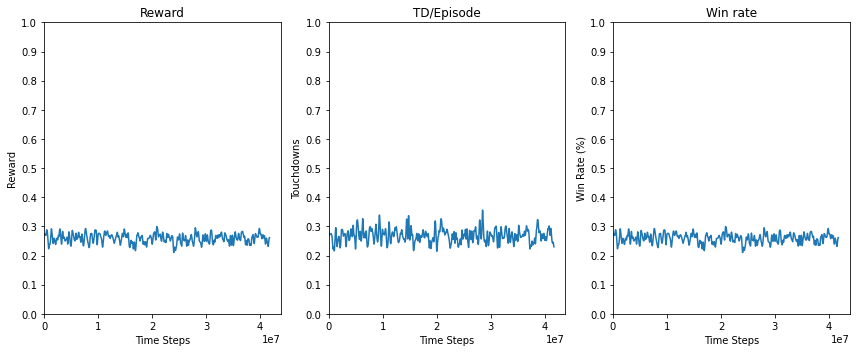

In [50]:
import pandas as pd
d = pd.read_csv('/local/s3092593/logs/botbowl-11/d64de83f-e251-11ec-af43-3cecef3aa7e8.dat', names=['updates', 'episodes', 'ts', 'win_rate', 'tds', 'opp_tds', 'reward', 'diff'])

fig, axs = plt.subplots(1, 3, figsize=(4*3, 5))
axs[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[0].plot(d['ts'], gaussian_filter(d['win_rate'], 5))
axs[0].set_title('Reward')
axs[0].set_ylim([0, 1])
axs[0].set_yticks(np.arange(0, 1.001, step=0.1))
axs[0].set_xlabel('Time Steps')
axs[0].set_ylabel('Reward')

axs[0].set_xlim(left=0)
axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[1].plot(d['ts'], gaussian_filter(d['tds'], 5), label="Learner")
axs[1].set_title('TD/Episode')
axs[1].set_ylim(bottom=0.0)
axs[1].set_yticks(np.arange(0, 1.001, step=0.1))
axs[1].set_xlim(left=0)
axs[1].set_xlabel('Time Steps')
axs[1].set_ylabel('Touchdowns')

if False:
    axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[1].plot(d['ts'], log_td_rate_opp, color="red", label="Opponent")
axs[2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[2].plot(d['ts'], gaussian_filter(d['win_rate'], 5))
axs[2].set_title('Win rate')            
axs[2].set_yticks(np.arange(0, 1.001, step=0.1))
axs[2].set_xlim(left=0)
axs[2].set_xlabel('Time Steps')
axs[2].set_ylabel('Win Rate (%)')

if False:
    axs[3].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[3].plot(log_steps, log_difficulty)
    axs[3].set_title('Difficulty')
    axs[3].set_yticks(np.arange(0, 1.001, step=0.1))
    axs[3].set_xlim(left=0)
fig.tight_layout()
plt.savefig('a2c.pdf')

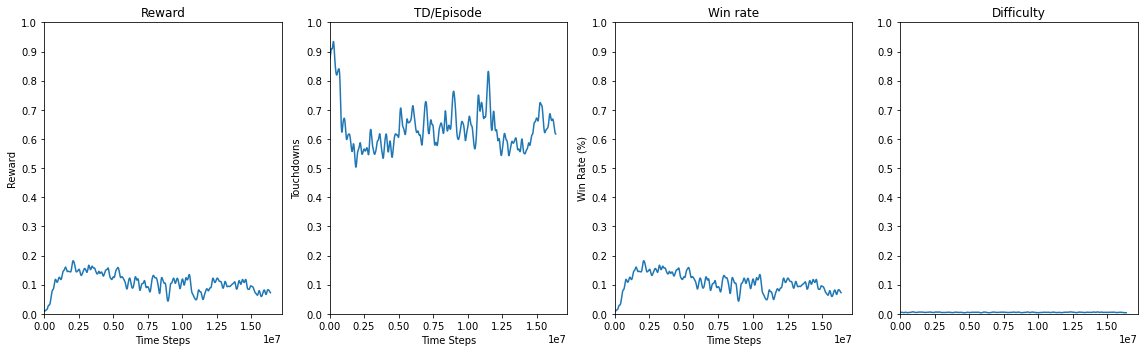

In [65]:
import pandas as pd
d = pd.read_csv('/local/s3092593/logs/botbowl-11/610e78bc-ddba-11ec-a40c-3cecef3aa7e8.dat', names=['updates', 'episodes', 'ts', 'win_rate', 'tds', 'opp_tds', 'reward', 'diff'])

fig, axs = plt.subplots(1, 4, figsize=(4*4, 5))
axs[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[0].plot(d['ts'], gaussian_filter(d['win_rate'], 5))
axs[0].set_title('Reward')
axs[0].set_ylim([0, 1])
axs[0].set_yticks(np.arange(0, 1.001, step=0.1))
axs[0].set_xlabel('Time Steps')
axs[0].set_ylabel('Reward')

axs[0].set_xlim(left=0)
axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[1].plot(d['ts'], gaussian_filter(d['tds'], 5), label="Learner")
axs[1].set_title('TD/Episode')
axs[1].set_ylim(bottom=0.0)
axs[1].set_yticks(np.arange(0, 1.001, step=0.1))
axs[1].set_xlim(left=0)
axs[1].set_xlabel('Time Steps')
axs[1].set_ylabel('Touchdowns')

if False:
    axs[1].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[1].plot(d['ts'], log_td_rate_opp, color="red", label="Opponent")
axs[2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[2].plot(d['ts'], gaussian_filter(d['win_rate'], 5))
axs[2].set_title('Win rate')            
axs[2].set_yticks(np.arange(0, 1.001, step=0.1))
axs[2].set_xlim(left=0)
axs[2].set_xlabel('Time Steps')
axs[2].set_ylabel('Win Rate (%)')

if True:
    difficulty = gaussian_filter(np.random.uniform(0, 0.01, len(d.index)), 5)
    axs[3].ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
    axs[3].plot(d['ts'], difficulty)
    axs[3].set_title('Difficulty')
    axs[3].set_yticks(np.arange(0, 1.001, step=0.1))
    axs[3].set_xlim(left=0)
fig.tight_layout()
plt.savefig('ppcg.pdf')

In [62]:
np.random.uniform(0, 0.01, len(d.index))

array([0.00775143, 0.00922343, 0.00088015, ..., 0.00572428, 0.00482669,
       0.00479607])